# Single node modeling example

In [17]:
using PyPlot, Wave, JetPackWave

In [12]:
v = read!("../marmousi_20m_nz151_nx461.bin", Array{Float32}(undef, 151,461));
dz,dx = 0.02,0.02
nz,nx = size(v)
@show dz,dx
@show nz,nx;

(dz, dx) = (0.02, 0.02)
(nz, nx) = (151, 461)


In [46]:
F = JopNlProp2DAcoIsoDenQ_DEO2_FDTD(;
    b = ones(Float32,size(v)),
    isinterior = true,
    ntrec = 1101,
    dtrec = 0.002,
    dtmod = 0.001,
    dz = dz,
    dx = dx,
    wavelet = WaveletCausalRicker(f=5.0),
    sx = dx*(nx/2),
    sz = dz,
    rx = dx*[0:0.5:nx-1;],
    rz = 2*dz*ones(length(0:0.5:nx-1)))

"Jet nonlinear operator, (151, 461) → (1101, 921)"

In [47]:
d = F*v

┌ Info: nonlinear forward on sal-gate0352.gcn0.chevron.net, srcfieldfile=field-dbd2d395-bbdf-4c21-b594-aa0db936dcd4.bin
└ @ JetPackWave /data/esdrd/nhwq/.julia/packages/JetPackWave/rNXHa/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:207
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step     1 of  2201 ;    0.00 MCells/s (IO= 0.00%, EX= 0.00%) -- rms d,p; 0.0000e+00 0.0000e+00
└ @ JetPackWave /data/esdrd/nhwq/.julia/packages/JetPackWave/rNXHa/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:514
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step   500 of  2201 ;  124.42 MCells/s (IO=38.15%, EX= 4.43%) -- rms d,p; 2.6048e-06 1.7796e-06
└ @ JetPackWave /data/esdrd/nhwq/.julia/packages/JetPackWave/rNXHa/src/jop_prop2DAcoIsoDenQ_DEO2_FDTD.jl:514
┌ Info: Prop2DAcoIsoDenQ_DEO2_FDTD, nonlinear forward, time step  1000 of  2201 ;  126.96 MCells/s (IO=38.32%, EX= 5.24%) -- rms d,p; 2.9437e-06 1.6505e-06
└ @ JetPackWave /data/esdrd/nhwq/.julia/packages/JetPackWave/rNXHa/src/jop_prop2DAcoI

1101×921 Array{Float32,2}:
  0.0           0.0           0.0          …   0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  0.0           0.0           0.0          …   0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  0.0           0.0           0.0          …   0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  0.0           0.0           0.0              0.0           0.0
  ⋮                                        ⋱                 ⋮
 -9.52695f-28   2.18991f-26   5.4006f-26       1.98177f-16  -2.44

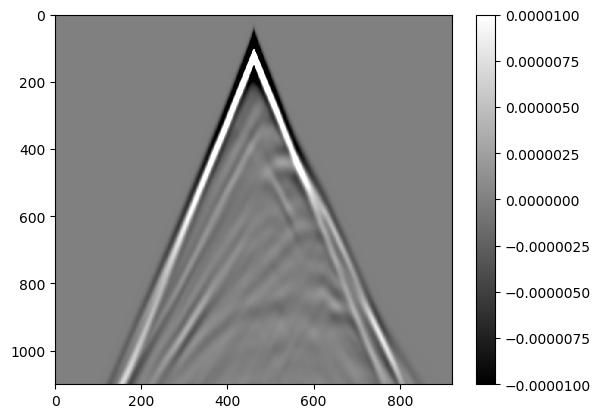

In [48]:
imshow(d,aspect="auto",cmap="gray");clim(-1e-5,1e-5);colorbar();